In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("reliance_stock.csv")
data.head()

,Date,Close
0,11/24/2014,492.30
1,11/25/2014,496.17
2,11/26/2014,493.67
3,11/27/2014,493.58
4,11/28/2014,495.42


In [3]:
data.shape

(1227, 2)

In [6]:
# last range
data.iloc[1226]

Date     11/18/2019
Close        1458.5
Name: 1226, dtype: object

In [7]:
len(data)

1227

In [9]:
data.insert(0, "Day", list(i for i in range(len(data))), True)
data.head()

,Day,Date,Close
0,0,11/24/2014,492.30
1,1,11/25/2014,496.17
2,2,11/26/2014,493.67
3,3,11/27/2014,493.58
4,4,11/28/2014,495.42


In [14]:
x = np.array(data.Day).reshape(-1,1)
y = np.array(data.Close)

In [15]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
svr_rbf = SVR(kernel = "rbf", C = 1000, gamma = 0.1, epsilon = 0.001)

In [60]:
svr_rbf.fit(x,y)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [49]:
a = np.array(list(i for i in range(1227,2000))).reshape(-1,1)

In [61]:
pred_fut = svr_rbf.predict(a)

In [62]:
pred_org = svr_rbf.predict(x)

In [63]:
r_sq = svr_rbf.score(pred_org[:, np.newaxis],y)
r_sq

0.4392419233283157

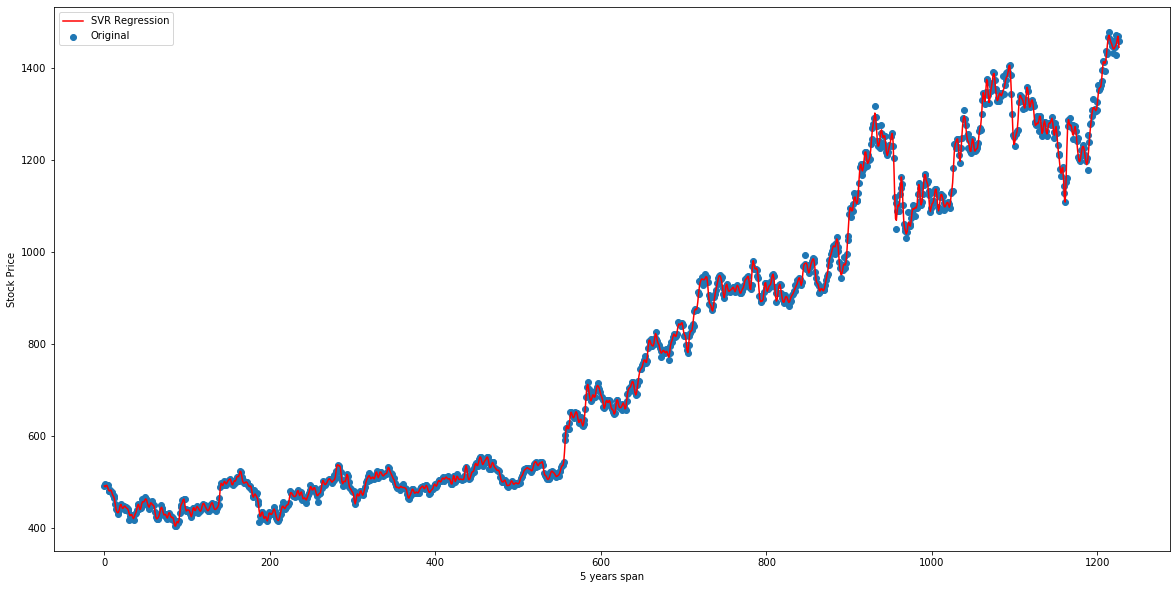

In [64]:
plt.figure(figsize = (20,10))
plt.scatter(x, y, label = "Original")
plt.plot(x, pred_org, label = "SVR Regression", color = "red")
plt.legend()
plt.xlabel("5 years span")
plt.ylabel("Stock Price")
plt.show()

In [65]:
new_y = np.concatenate((y, pred_fut), axis=0)

In [66]:
new_x = np.concatenate((x, a), axis=0)

In [67]:
new_x

array([[   0],
       [   1],
       [   2],
       ...,
       [1997],
       [1998],
       [1999]])

In [68]:
new_y

array([492.3       , 496.17      , 493.67      , ..., 786.30129444,
       786.30129444, 786.30129444])

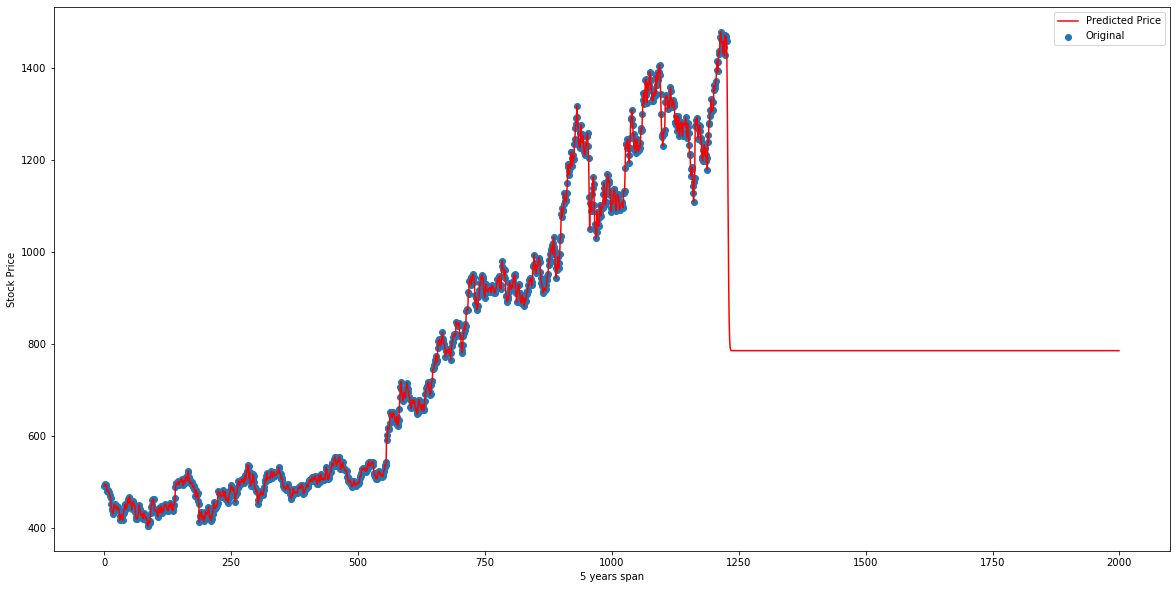

In [69]:
plt.figure(figsize = (20,10))
plt.scatter(x, y, label = "Original")
plt.plot(new_x, new_y, label = "Predicted Price", color = "red")
plt.legend()
plt.xlabel("5 years span")
plt.ylabel("Stock Price")
plt.show()